# Travelling Salesman - Simulated Annealing


In [198]:
import math
import random
from matplotlib import pyplot as plt

# function to calculate the distance between two cities
def calculate_hypotenuse(cits, a, b):
    x1, y1 = cits[a]
    x2, y2 = cits[b]
    return math.sqrt( abs(x1-x2)**2 + abs(y1-y2) )

# function to calculate the length of the path
def calculate_distance(cits, path):
    l = len(path)
    total = 0
    for i in range(l):
        total += calculate_hypotenuse(cits, path[i], path[(i+1)%l])
    return total

# function generating a random initial path
def create_initial_random(cits):
    indices = list(range(len(cits)))
    random.shuffle(indices)
    return indices

# function generating the initial path using greedy algorithm
# always choosing the closest unvisited node
def create_initial_greedy(cits, start):
    path = [start]
    while len(path) < len(cits):
        current = path[-1]
        indices = [ind for ind in range(len(cits)) if ind not in path]
        smallest = float("inf")
        next = -1
        for ind in indices:
            if calculate_hypotenuse(cits, current, ind) < smallest:
                smallest = calculate_hypotenuse(cits, current, ind)
                next = ind
        path.append(next)
    return path

# path drawing function
def draw_path(cits, path):
    route = [cits[path[-1]]]
    for n in path:
        route.append(cits[n])
    x, y = zip(*route)
    plt.scatter(x, y, c="r")
    plt.plot(x, y)
    plt.show()

# function calculating acceptance probability
def acceptance_probability(current, new, temp):
    if new < current:
        return 1
    else:
        return math.exp( (current-new)/temp )

# function that swaps two random nodes
def node_swapper(path):
    p = list(path)
    index1 = random.randrange(0, len(p))
    index2 = index1
    while index2 == index1:
        index2 = random.randrange(0, len(p))
    temp = p[index2]
    p[index2] = p[index1]
    p[index1] = temp
    return p

def simulated_annealing(cits, path, tmax, tmin, alpha):
    p = list(path)
    print(f"Running Simulated Annealing. Starting temperature = {tmax}, minimum temperature = {tmin}, alpha = {alpha}")
    print("Initial route:")
    draw_path(cits, p)
    current = calculate_distance(cits, p)
    print("Initial distance =", current)
    dists = [current]
    while tmax > tmin:
        new_p = node_swapper(p)
        new_p_dist = calculate_distance(cits, new_p)
        tmax *= alpha
        if acceptance_probability(current, new_p_dist, tmax) > random.random():
            p = list(new_p)
            current = calculate_distance(cits, p)
            dists.append(current)
    print("Final route:")
    draw_path(cits, p)
    print("Final distance = ", dists[-1])
    plt.plot(dists)
    plt.show()

### A map of 24 nodes

[(2.7933, 3.694), (2.6067, 4.4254), (2.86, 5.0373), (2.54, 6.2463), (3.1267, 6.4701), (3.7267, 6.8881), (4.4867, 7.4403), (5.5533, 7.4254), (6.3, 7.3955), (7.6333, 6.9179), (7.22, 6.3955), (6.6333, 5.8284), (7.0867, 5.1269), (7.4733, 4.4701), (7.18, 3.709), (6.6867, 2.8284), (6.2067, 2.0522), (5.54, 1.8731), (5.1533, 2.3358), (4.9667, 3.0075), (4.8867, 3.5448), (4.2733, 3.2313), (3.6333, 2.7537), (2.9933, 2.8433)]


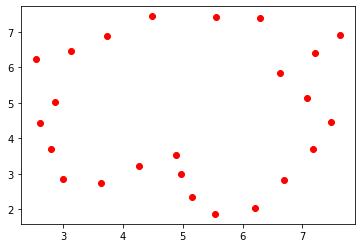

In [207]:
# converting the input matrix into a 2d list
with open("TSP Matrix3.csv") as input:
    cities = [tuple([float(n) for n in line.split(",")]) for line in input.read().splitlines()]

print(cities)

# * operator can be used in conjunction with zip() to unzip the list
x, y = zip(*cities)
plt.scatter(x, y, c="r")
plt.show()

Optimal Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Optimal Path distance: 22.077328545028728


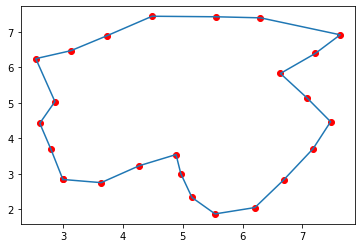

Initial Greedy Path: [20, 19, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 10, 9]
Initial Greedy Path distance: 26.275141885605432


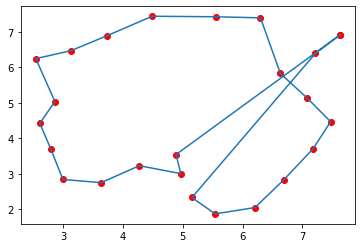

Initial Random Path: [15, 4, 18, 3, 19, 8, 22, 10, 1, 14, 2, 20, 17, 12, 0, 13, 5, 16, 23, 7, 9, 21, 6, 11]
Initial Random Path distance: 78.93750823608589


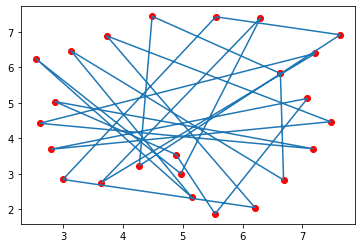

In [211]:
optimal = list(range(len(cities)))
print("Optimal Path:", optimal)
print("Optimal Path distance:", calculate_distance(cities, optimal))
draw_path(cities, optimal)

initial_greedy = create_initial_greedy(cities, random.randrange(len(cities)))
print("Initial Greedy Path:", initial_greedy)
print("Initial Greedy Path distance:", calculate_distance(cities, initial_greedy))
draw_path(cities, initial_greedy)

initial_random = create_initial_random(cities)
print("Initial Random Path:", initial_random)
print("Initial Random Path distance:", calculate_distance(cities, initial_random))
draw_path(cities, initial_random)

Running Simulated Annealing. Starting temperature = 35, minimum temperature = 0.0005, alpha = 0.999
Initial route:


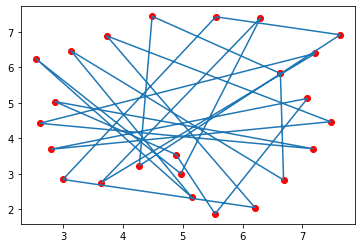

Initial distance = 78.93750823608589
Final route:


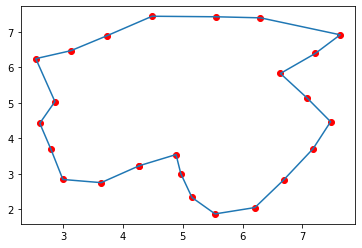

Final distance =  22.077328545028728


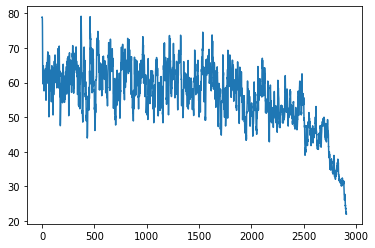

In [225]:
simulated_annealing(cities, initial_random, 35, 0.0005, 0.999)

Running Simulated Annealing. Starting temperature = 0.2, minimum temperature = 0.0005, alpha = 0.999
Initial route:


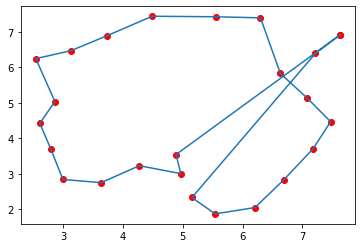

Initial distance = 26.275141885605432
Final route:


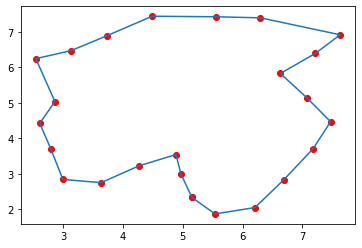

Final distance =  22.077328545028728


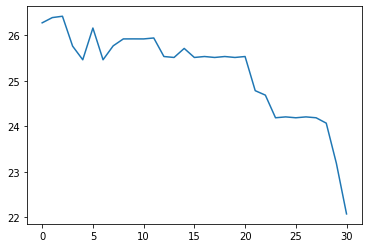

In [234]:
simulated_annealing(cities, initial_greedy, 0.2, 0.0005, 0.999)

### A random map of 100 nodes

[(2.257, 1.689), (5.974, 5.381), (4.233, 2.796), (8.296, 2.714), (6.629, 3.854), (2.771, 4.741), (2.09, 5.038), (7.992, 8.467), (6.906, 8.045), (5.178, 4.273), (8.696, 0.031), (2.658, 5.531), (7.798, 7.115), (8.507, 2.142), (0.214, 0.798), (3.789, 9.654), (7.932, 6.639), (9.917, 8.178), (4.91, 2.911), (6.169, 4.744), (4.414, 2.211), (8.759, 3.133), (7.973, 6.686), (7.11, 2.276), (2.703, 2.307), (2.825, 7.304), (5.057, 6.933), (3.156, 4.466), (3.851, 0.572), (4.757, 6.769), (3.122, 8.66), (1.011, 1.137), (0.942, 5.814), (2.454, 7.684), (4.055, 9.981), (3.144, 1.514), (1.367, 7.591), (4.352, 6.541), (3.877, 7.584), (0.374, 1.002), (7.031, 5.201), (0.196, 6.042), (4.378, 2.776), (9.966, 9.313), (1.989, 7.789), (8.398, 4.77), (5.682, 9.516), (2.821, 6.132), (7.923, 2.411), (8.296, 4.557), (1.128, 7.547), (7.428, 3.179), (3.183, 0.204), (2.121, 3.441), (6.573, 9.45), (2.346, 1.67), (3.424, 3.897), (9.99, 5.261), (3.374, 5.266), (2.222, 9.643), (8.14, 5.569), (9.488, 4.556), (3.515, 5.999), 

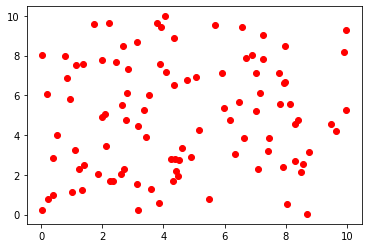

In [236]:
rand_cities = []

for i in range(100):
    a = round(random.uniform(0, 10), 3)
    b = round(random.uniform(0, 10), 3)
    rand_cities.append((a, b))
    

print(rand_cities)

# * operator can be used in conjunction with zip() to unzip the list
x, y = zip(*rand_cities)
plt.scatter(x, y, c="r")
plt.show()

Initial Greedy Path: [57, 61, 98, 21, 3, 66, 13, 48, 23, 51, 71, 4, 68, 19, 1, 86, 40, 94, 75, 60, 45, 49, 16, 22, 12, 79, 97, 93, 8, 85, 54, 46, 76, 74, 15, 34, 30, 84, 33, 44, 36, 50, 73, 91, 80, 32, 41, 89, 69, 82, 88, 81, 0, 55, 78, 24, 35, 70, 28, 52, 99, 90, 20, 87, 42, 2, 18, 92, 9, 29, 26, 37, 77, 38, 25, 47, 62, 58, 11, 5, 27, 56, 53, 95, 6, 83, 31, 39, 14, 65, 64, 67, 59, 96, 7, 17, 43, 10, 72, 63]
Initial Greedy Path distance: 101.02816240935837


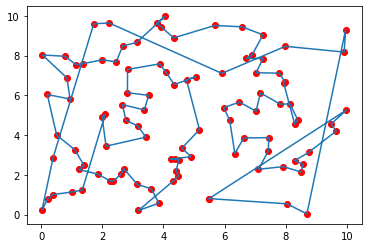

Initial Random Path: [50, 91, 47, 80, 35, 39, 57, 4, 19, 66, 65, 25, 99, 98, 38, 67, 43, 64, 24, 20, 16, 23, 75, 14, 37, 41, 30, 2, 88, 70, 36, 92, 78, 96, 42, 28, 71, 87, 61, 76, 55, 13, 48, 86, 95, 94, 97, 89, 18, 3, 46, 49, 22, 62, 33, 1, 77, 44, 56, 90, 31, 52, 85, 93, 21, 63, 15, 11, 32, 0, 9, 54, 6, 8, 68, 12, 7, 27, 69, 29, 51, 45, 34, 79, 26, 17, 53, 60, 72, 5, 40, 84, 82, 10, 81, 74, 73, 83, 58, 59]
Initial Random Path distance: 368.19268314544


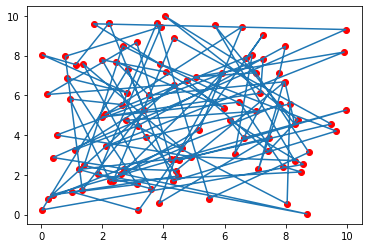

In [237]:
initial_greedy = create_initial_greedy(rand_cities, random.randrange(len(rand_cities)))
print("Initial Greedy Path:", initial_greedy)
print("Initial Greedy Path distance:", calculate_distance(rand_cities, initial_greedy))
draw_path(rand_cities, initial_greedy)

initial_random = create_initial_random(rand_cities)
print("Initial Random Path:", initial_random)
print("Initial Random Path distance:", calculate_distance(rand_cities, initial_random))
draw_path(rand_cities, initial_random)

Running Simulated Annealing. Starting temperature = 20, minimum temperature = 0.0005, alpha = 0.999
Initial route:


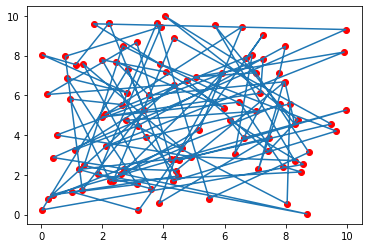

Initial distance = 368.19268314544
Final route:


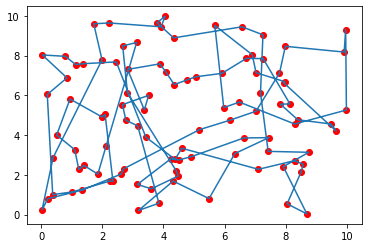

Final distance =  124.00228760631245


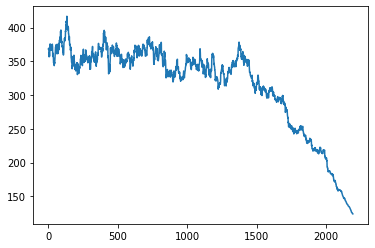

In [245]:
simulated_annealing(rand_cities, initial_random, 20, 0.0005, 0.999)

Running Simulated Annealing. Starting temperature = 0.4, minimum temperature = 0.0001, alpha = 0.9999
Initial route:


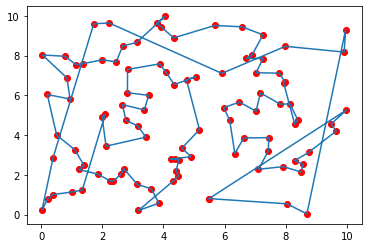

Initial distance = 101.02816240935837
Final route:


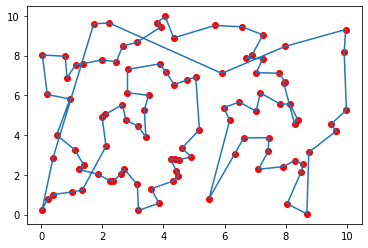

Final distance =  95.50994293917933


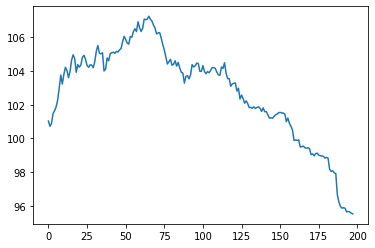

In [257]:
simulated_annealing(rand_cities, initial_greedy, 0.4, 0.0001, 0.9999)